In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [11]:
df = pd.read_parquet("../../data/yellow_tripdata_2022-01.parquet")

In [12]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [27]:
df.shape

(2463931, 19)

In [28]:
len(df.columns)

19

In [29]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

/tmp/ipykernel_86010/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

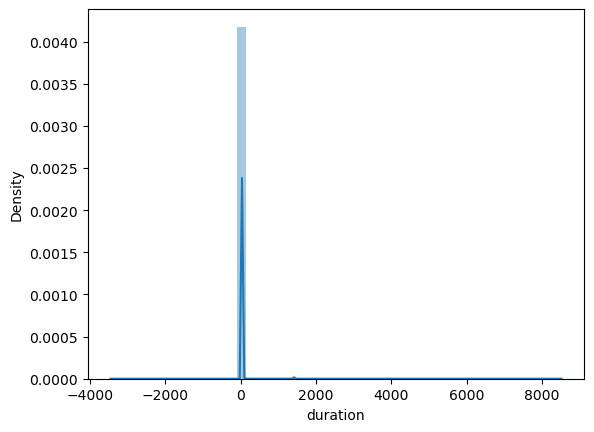

In [30]:
sns.distplot(df.duration)

In [31]:
df.duration.describe().round(2)

count    2463931.00
mean          14.21
std           46.45
min        -3442.40
25%            6.32
50%           10.18
75%           16.17
max         8513.18
Name: duration, dtype: float64

In [32]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99]).round()

count    2463931.0
mean          14.0
std           46.0
min        -3442.0
50%           10.0
95%           32.0
98%           42.0
99%           51.0
max         8513.0
Name: duration, dtype: float64

In [33]:
((df.duration >= 1) & (df.duration <= 60 )).mean()

0.9827547930522406

In [34]:
df = df[(df.duration >= 1) & (df.duration <= 60 )].copy()

In [35]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [36]:
df[categorical] = df[categorical].astype(str)

In [37]:
train_dicts = df[categorical].to_dict(orient='records')

In [38]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [39]:
len(dv.feature_names_)

515

In [40]:
target = 'duration'

In [41]:
y_train=df[target].values

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(X_train)

/tmp/ipykernel_86010/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_86010/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


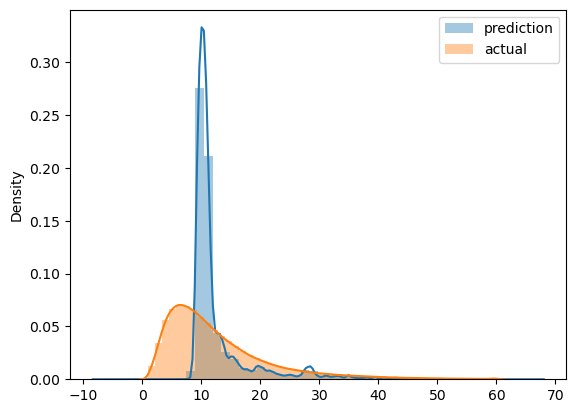

In [44]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [45]:
mean_squared_error(y_train, y_pred, squared=False).round(2)

6.99

In [46]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    
    df = df[(df.duration >= 1) & (df.duration <= 60 )].copy()
    
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [47]:
df_train = read_dataframe("../data/yellow_tripdata_2022-01.parquet")
df_val = read_dataframe("../data/yellow_tripdata_2022-02.parquet")

In [48]:
len(df_train), len(df_val)

(2421440, 2918187)

In [49]:
dv = DictVectorizer()
categorical = ['PULocationID', 'DOLocationID']

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [50]:
target = 'duration'
y_train=df_train[target].values
y_val=df_val[target].values

In [51]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False).round(2)

7.79

## Adding trip distance as a feature

In [52]:
dv = DictVectorizer()
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False).round(2)

7.8

## Using filtered data

In [3]:
def read_filtered_dataframe(filename):
    df = pd.read_parquet(filename)
    
    # Only using credit card trips and standard rate
    df = df[(df.payment_type==1) & (df.RatecodeID==1)].copy()
    # Only using one vendor
    # df = df[(df.VendorID==1)].copy()
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    
    df = df[(df.duration >= 1) & (df.duration <= 60 )].copy()
    
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [5]:
df_filter_train = read_filtered_dataframe("../../data/yellow_tripdata_2022-01.parquet")
df_filter_val = read_filtered_dataframe("../../data/yellow_tripdata_2022-02.parquet")

In [6]:
dv = DictVectorizer()
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

train_filter_dicts = df_filter_train[categorical + numerical].to_dict(orient='records')
X_filter_train = dv.fit_transform(train_filter_dicts)

val_filter_dicts = df_filter_val[categorical + numerical].to_dict(orient='records')
X_filter_val = dv.transform(val_filter_dicts)

In [7]:
target = 'duration'
y_filter_train = df_filter_train[target].values
y_filter_val = df_filter_val[target].values

In [13]:
lr = LinearRegression()
lr.fit(X_filter_train, y_filter_train)

y_filter_pred = lr.predict(X_filter_val)
mean_squared_error(y_filter_val, y_filter_pred, squared=False).round(2)

5.47